# Computational Linear Algebra
### MNIST Dataset - PCA
Juan Camilo Sarmiento - Equinox - Plan Semilla - Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition

#### Load the MNIST dataset:

MNIST dataset page: http://yann.lecun.com/exdb/mnist/
* [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz):  training set images (9912422 bytes)
* [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz):  training set labels (28881 bytes)
* [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz):   test set images (1648877 bytes)
* [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz):   test set labels (4542 bytes)


In [2]:
# Function by George Hotz: https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb
# load the mnist dataset
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("data", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

View the shape and correct to have vectors for each item:

In [3]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train.shape

(60000, 784)

#### PCA:
- Standardize the dataset
- Calculate cov matrix
- Find eigenvalues and eigenvectors and sort them
- Pick k eigenvalues and form matrix of eigenvectors ()

Covariance:

$C_{x,y}=\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\overline{x})(y_i-\overline{y})$

When the data is centerd, covariance matrix can be simplified to 

$Cov=\frac{A^T*A}{n-1}$

In [5]:
def standardize_matrix(X):
    num = X - np.mean(X,axis=0)
    # print(num.shape)
    den = np.std(X,axis=0)
    # print(den.shape)
    res = np.divide(num,den,out=np.zeros_like(num),where=den!=0)
    # print(res.shape)
    return res

standard_data=standardize_matrix(X_train)
standard_data.shape


(60000, 784)

Comparing to sklearn std scaler:

In [6]:
from sklearn.preprocessing import StandardScaler
sk_standard_data=StandardScaler().fit_transform(X_train)
np.sum(standard_data-sk_standard_data)


0.0

Getting the covariance matrix:

In [7]:
cov_matrix=np.matmul(standard_data.T,standard_data)/standard_data.shape[0]
cov_matrix.shape

(784, 784)

In [8]:
# np_cov_m=np.cov(standard_data)
# np.sum(np_cov_m-cov_matrix)

In [9]:
evals,evecs=np.linalg.eig(cov_matrix)
evals.shape,evecs.shape

((784,), (784, 784))

In [10]:
# Sort descending by eigenvalues and select number of components for pca
idx=evals.argsort()[::-1]
evals=evals[idx]
evecs=evecs[:,idx]

components=2
evecs_pca=evecs[:,:components]
evecs_pca.shape

(784, 2)

To visualize:

In [11]:
#change shape for multiplying:
evecs_pca=evecs_pca.T
evecs_pca.shape,standard_data.T.shape

((2, 784), (784, 60000))

In [12]:
points=np.matmul(evecs_pca,standard_data.T).T
points.shape

(60000, 2)

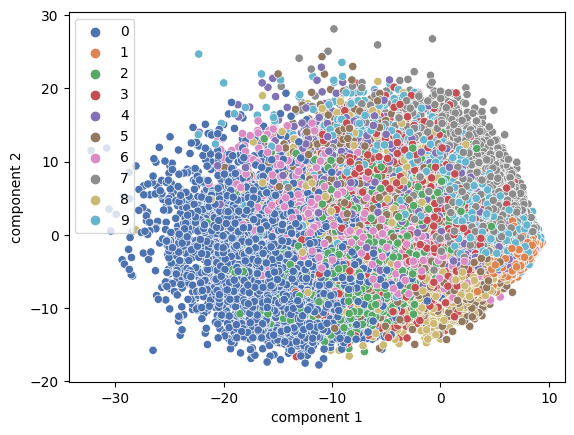

In [34]:
sns.scatterplot(x=points[:points.shape[0],0],y=points[:points.shape[0],1],hue=Y_train[:points.shape[0]],palette='deep')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show()